# A bit of data munging

Data munging and data wrangling are terms used to prepare a dataset ready for analysis. Well, we can also call this process as data curation! 

## Importing a `csv` file

Let's play with the global land temperature dataset containing country-specific data from 1743 to 2013 downloaded from [https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/version/2?select=GlobalLandTemperaturesByCountry.csv](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/version/2?select=GlobalLandTemperaturesByCountry.csv). You can find a copy of the `csv` file in the `datasets` folder [https://github.com/raghurama123/DataScience/tree/main/datasets](https://github.com/raghurama123/DataScience/tree/main/datasets). 

In [1]:
import pandas as pd
temp=pd.read_csv('../datasets/GlobalLandTemperaturesByCountry.csv')
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


If you want to have a full control on the data loading process, you can specify options to the `read_csv` function.  Here is one way to do this.

In [2]:
import pandas as pd
temp=pd.read_csv('../datasets/GlobalLandTemperaturesByCountry.csv', sep=',', decimal='.', header=0)
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


`header=0` means that you have the column names (header) in the first line of the files. You can even change the column names while loading the data.

In [3]:
import pandas as pd
temp=pd.read_csv('../datasets/GlobalLandTemperaturesByCountry.csv', sep=',', \
                 decimal='.', header=0, names=['date','meanT','fluctuation','Country'])
temp

,date,meanT,fluctuation,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


## Remove missing entries

There are over half-a-million records, but some entries are missing denoted by `NaN`. Let's filter these and look at the remaining entries.

In [4]:
temp.isna()

,date,meanT,fluctuation,Country
0,False,False,False,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
577457,False,False,False,False
577458,False,False,False,False
577459,False,False,False,False
577460,False,False,False,False


In [5]:
temp.isna().sum() # Total number of entries to be dropped.

date               0
meanT          32651
fluctuation    31912
Country            0
dtype: int64

In [6]:
temp=temp.dropna().reset_index(drop=True) # drop NaN entries and reassign row-indices
temp

,date,meanT,fluctuation,Country
0,1743-11-01,4.384,2.294,Åland
1,1744-04-01,1.530,4.680,Åland
2,1744-05-01,6.702,1.789,Åland
3,1744-06-01,11.609,1.577,Åland
4,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
544806,2013-04-01,21.142,0.495,Zimbabwe
544807,2013-05-01,19.059,1.022,Zimbabwe
544808,2013-06-01,17.613,0.473,Zimbabwe
544809,2013-07-01,17.000,0.453,Zimbabwe


## Quick inspection and curation of the dataset

In [7]:
temp.describe()

,meanT,fluctuation
count,544811.000000,544811.000000
mean,17.193354,1.019190
std,10.953966,1.202634
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.207000
max,38.842000,15.003000


It looks like some entries have large uncertainties. Note that that maximum uncertainty is as large as 15 degree Celsius. Let's remove these data points.

In [8]:
temp=temp[temp['fluctuation'] <= 0.5]  # Retain data with uncertainty < 0.5 degree Celsius
temp.describe()

,meanT,fluctuation
count,244147.000000,244147.000000
mean,18.855830,0.310470
std,9.566641,0.098011
min,-33.492000,0.052000
25%,12.875000,0.234000
50%,22.606000,0.306000
75%,26.247000,0.388000
max,38.842000,0.500000


In [9]:
temp

,date,meanT,fluctuation,Country
1126,1843-09-01,11.452,0.472,Åland
1128,1843-11-01,2.604,0.467,Åland
1326,1860-05-01,5.380,0.466,Åland
1384,1865-03-01,-4.983,0.412,Åland
1390,1865-09-01,12.020,0.459,Åland
...,...,...,...,...
544795,2012-05-01,19.712,0.312,Zimbabwe
544796,2012-06-01,16.631,0.277,Zimbabwe
544806,2013-04-01,21.142,0.495,Zimbabwe
544808,2013-06-01,17.613,0.473,Zimbabwe


Looks like the row-indices are not reset. So, let's reset them.

In [10]:
temp=temp.reset_index(drop=True)
temp

,date,meanT,fluctuation,Country
0,1843-09-01,11.452,0.472,Åland
1,1843-11-01,2.604,0.467,Åland
2,1860-05-01,5.380,0.466,Åland
3,1865-03-01,-4.983,0.412,Åland
4,1865-09-01,12.020,0.459,Åland
...,...,...,...,...
244142,2012-05-01,19.712,0.312,Zimbabwe
244143,2012-06-01,16.631,0.277,Zimbabwe
244144,2013-04-01,21.142,0.495,Zimbabwe
244145,2013-06-01,17.613,0.473,Zimbabwe


In [11]:
temp.head(10)  # first 10 entries

,date,meanT,fluctuation,Country
0,1843-09-01,11.452,0.472,Åland
1,1843-11-01,2.604,0.467,Åland
2,1860-05-01,5.380,0.466,Åland
3,1865-03-01,-4.983,0.412,Åland
4,1865-09-01,12.020,0.459,Åland
5,1866-01-01,2.033,0.462,Åland
6,1866-10-01,6.546,0.416,Åland
7,1869-11-01,0.745,0.458,Åland
8,1870-08-01,14.438,0.373,Åland
9,1871-07-01,15.755,0.369,Åland


In [12]:
temp.tail(10) # last 10 entries

,date,meanT,fluctuation,Country
244137,2011-12-01,24.013,0.356,Zimbabwe
244138,2012-01-01,23.872,0.247,Zimbabwe
244139,2012-02-01,24.294,0.305,Zimbabwe
244140,2012-03-01,23.596,0.354,Zimbabwe
244141,2012-04-01,20.349,0.462,Zimbabwe
244142,2012-05-01,19.712,0.312,Zimbabwe
244143,2012-06-01,16.631,0.277,Zimbabwe
244144,2013-04-01,21.142,0.495,Zimbabwe
244145,2013-06-01,17.613,0.473,Zimbabwe
244146,2013-07-01,17.000,0.453,Zimbabwe


## Now we can do some meaningful analysis

In [13]:
minval=temp['meanT'].min()
coolest=temp[temp['meanT']==minval] 
print(coolest)

             date   meanT  fluctuation    Country
89912  1992-02-01 -33.492        0.472  Greenland


<AxesSubplot:ylabel='Frequency'>

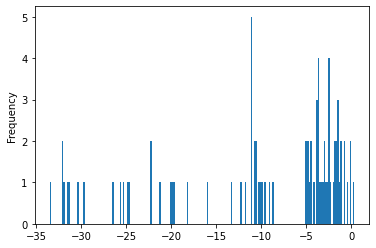

In [14]:
tempGreenland=temp[temp["Country"] == "Greenland"]
tempGreenland['meanT'].plot.hist(bins=200, alpha=1.0)

In [15]:
maxval=temp['meanT'].max()
hottest=temp[temp['meanT'] ==maxval] 
print(hottest)

              date   meanT  fluctuation Country
121760  2012-07-01  38.842        0.464  Kuwait


<AxesSubplot:ylabel='Frequency'>

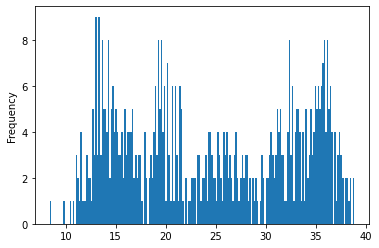

In [16]:
tempKuwait=temp[temp["Country"] == "Kuwait"]
tempKuwait['meanT'].plot.hist(bins=200, alpha=1.0)

<AxesSubplot:ylabel='Frequency'>

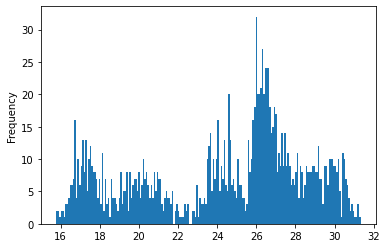

In [17]:
tempIndia=temp[temp["Country"] == "India"]
tempIndia['meanT'].plot.hist(bins=200, alpha=1.0)

In [18]:
tempIndia[ tempIndia['meanT'] <= 18 ] 

,date,meanT,fluctuation,Country
103768,1875-12-01,17.493,0.306,India
103787,1882-12-01,17.571,0.410,India
103788,1883-01-01,16.645,0.480,India
103838,1891-12-01,17.246,0.476,India
103868,1895-12-01,16.616,0.458,India
...,...,...,...,...
105191,2010-01-01,17.109,0.326,India
105202,2010-12-01,17.455,0.195,India
105203,2011-01-01,16.478,0.244,India
105215,2012-01-01,16.778,0.267,India


In [19]:
tempIndia[ tempIndia['meanT'] >= 30 ] 

,date,meanT,fluctuation,Country
103821,1889-05-01,30.025,0.331,India
103853,1894-05-01,30.165,0.246,India
103861,1895-05-01,30.519,0.382,India
103873,1896-05-01,30.707,0.257,India
103883,1897-05-01,30.695,0.446,India
...,...,...,...,...
105195,2010-05-01,31.169,0.166,India
105207,2011-05-01,30.421,0.170,India
105219,2012-05-01,30.805,0.221,India
105220,2012-06-01,30.536,0.240,India


It is actually possible to sort the entries according to one column. Then you can quickly glance at the extreme data points. 

In [20]:
temp.sort_values(by="meanT")

,date,meanT,fluctuation,Country
89912,1992-02-01,-33.492,0.472,Greenland
62661,1992-02-01,-32.733,0.463,Denmark
89932,1998-02-01,-32.109,0.444,Greenland
89900,1989-03-01,-32.089,0.484,Greenland
89919,1993-12-01,-31.884,0.450,Greenland
...,...,...,...,...
121766,2013-07-01,38.234,0.454,Kuwait
121634,1998-08-01,38.436,0.353,Kuwait
121736,2010-07-01,38.495,0.498,Kuwait
121652,2000-07-01,38.705,0.467,Kuwait
